In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_column', None)

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,5,13,6,6,-0.469819,0.358126,1.068105,-0.559650,-0.366905,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,4,6,16,9,0.591035,-0.396915,0.145834,-0.030798,0.471167,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,8,9,3,11,-0.679875,0.469326,0.349843,-0.288042,0.291470,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,8,9,6,4,-0.389456,0.626762,-1.074543,-1.521753,-1.150806,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,3,1,13,11,-0.120743,-0.615578,-1.064359,0.444142,0.428327,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


#### Missing Values

In [6]:
feature_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
print(f"Total number of features containing null values are: {len(feature_with_nan)}")

Total number of features containing null values are: 0


In [7]:
for feature in df.columns:
    print(f"{feature}: {df[feature].unique()}")

id: [    0     1     2 ... 97997 97998 97999]
f_00: [-0.38941991 -0.68924911  0.80907887 ... -0.24936396  0.31140777
  0.75516962]
f_01: [-0.91279148 -0.45395353  0.32456779 ... -0.45954469  2.18523699
  0.56748316]
f_02: [ 0.64895116  0.65417452 -1.17060221 ...  1.88612213  0.76136684
  1.45676686]
f_03: [ 0.58904476  0.99524827 -0.62449116 ... -1.34030983  0.43672314
 -0.57907072]
f_04: [-0.83081739 -1.65301963  0.1054483  ...  0.19502868  0.46496677
 -0.04847374]
f_05: [ 0.73362375  0.86381027  0.78394778 ... -0.5595195   0.06232118
 -1.20624025]
f_06: [ 2.25856015 -0.090651    1.98830053 ... -0.37976682 -0.33402537
  0.78430488]
f_07: [ 2  5  6  8  4  1 16  3  7 11 19 12  9 10 15  0 21 13 23 14 17 20 18 25
 22 24 26 29 30 27 28 32]
f_08: [13  3 11  2  7  1  8  4 15  6  5 10  9 17 12 16  0 14 19 18 22 24 20 23
 21 27 25 26 30]
f_09: [14  6  5 13  1 17  4 12  9 21 11  7  3  8  0 10 25 16 26  2 27 15 18 20
 19 28 24 23 32 22 29 35 31 39 38 30 33 34 37 36 43 40 44 41 42]
f_10: [ 5  4  

#### Numerical Feature

In [12]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O' and feature != 'id']
print(f"Total number of numerical features are: {len(numerical_feature)}")
print(numerical_feature)

Total number of numerical features are: 29
['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']


In [13]:
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique()) < 25]
print(f"Total number of discrete features are: {len(discrete_feature)}")
print(discrete_feature)

Total number of discrete features are: 0
[]


In [14]:
continous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print(f"Total number of continous features are: {len(continous_feature)}")
print(continous_feature)

Total number of continous features are: 29
['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']


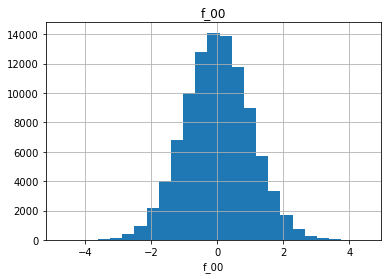

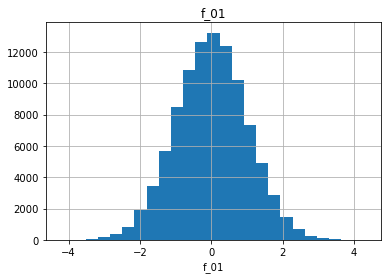

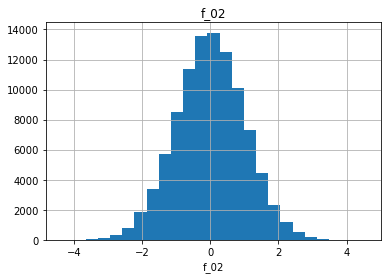

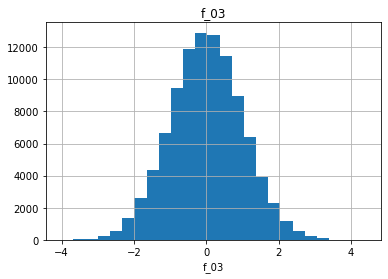

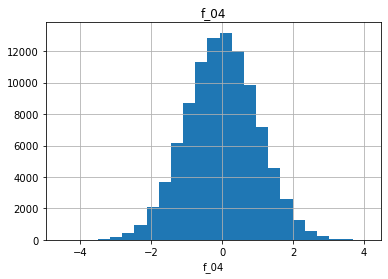

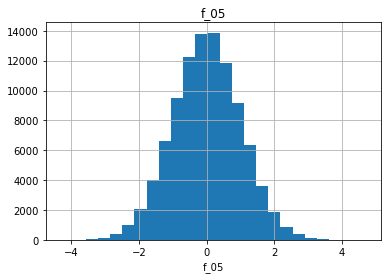

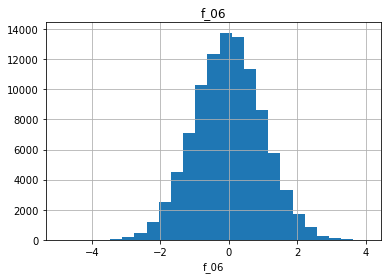

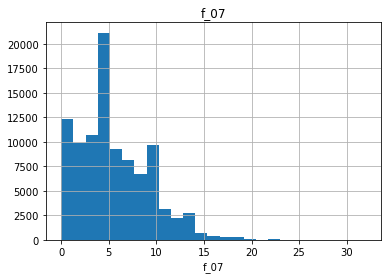

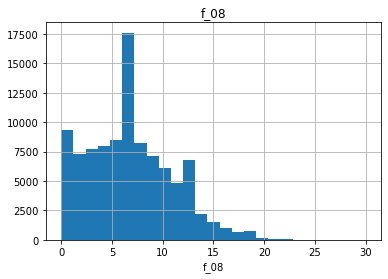

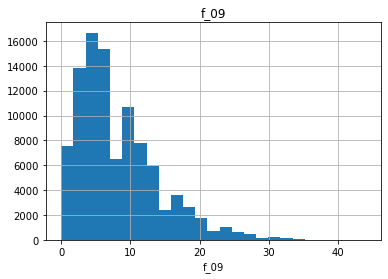

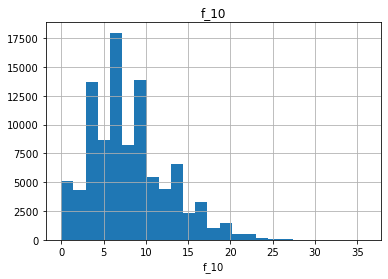

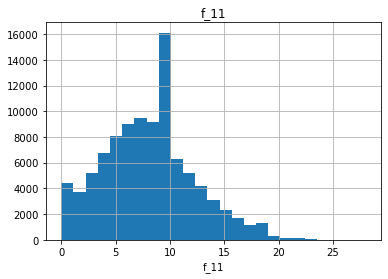

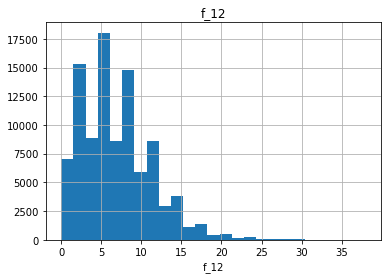

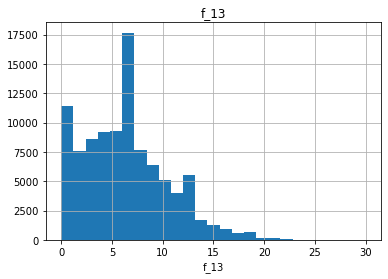

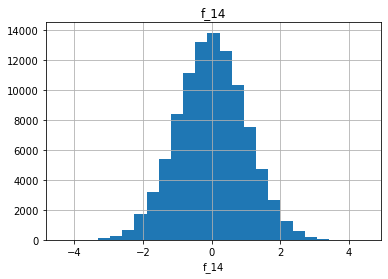

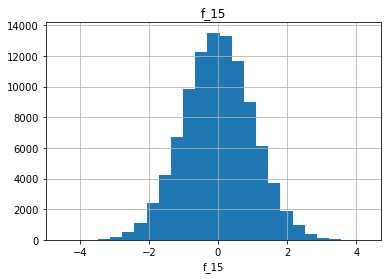

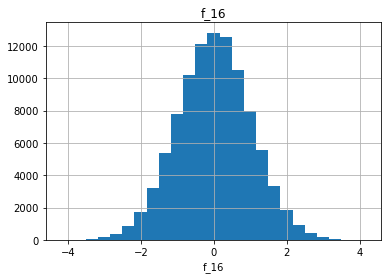

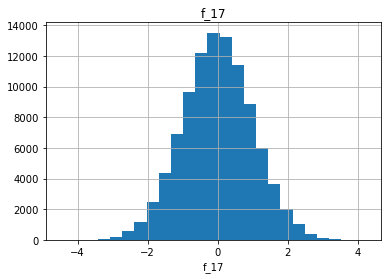

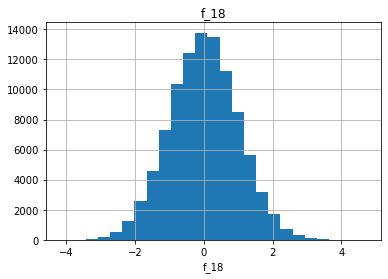

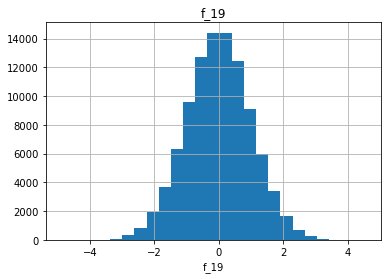

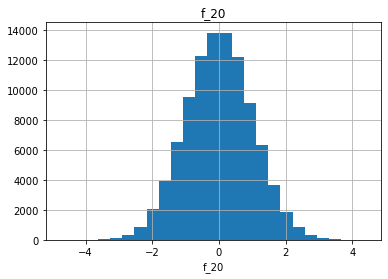

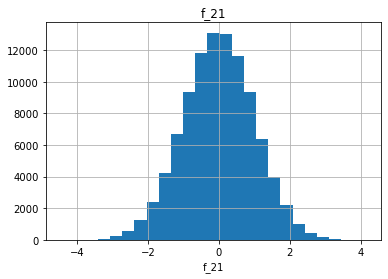

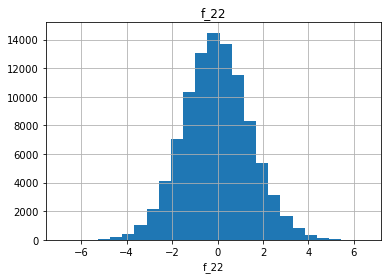

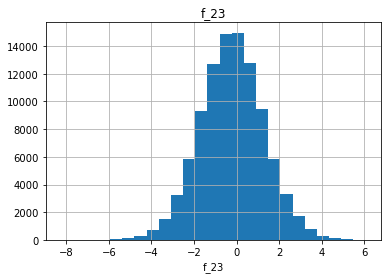

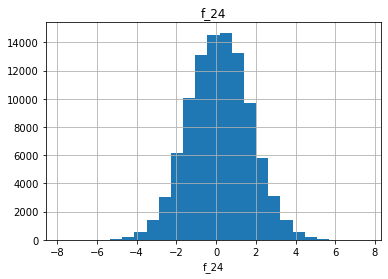

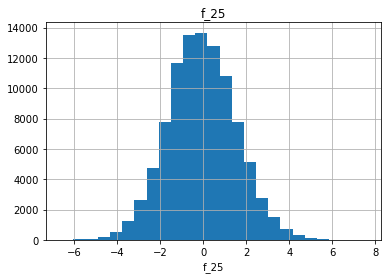

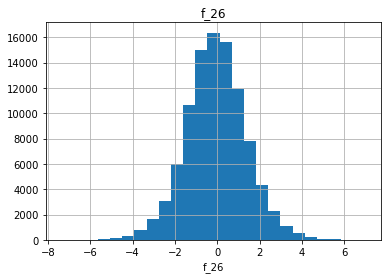

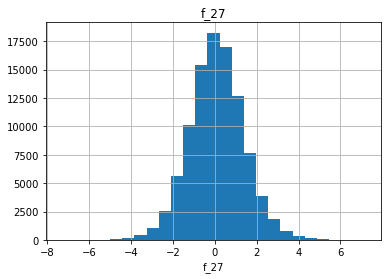

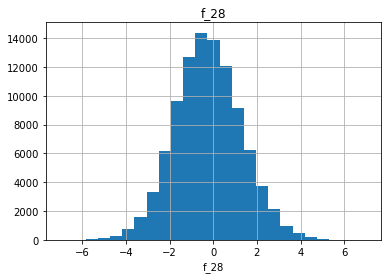

In [15]:
for feature in continous_feature:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

Most of the continous features are normally distributed or gaussian distributed.

#### Cheking for outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


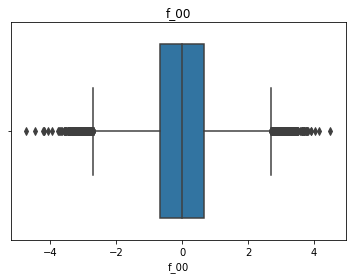

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


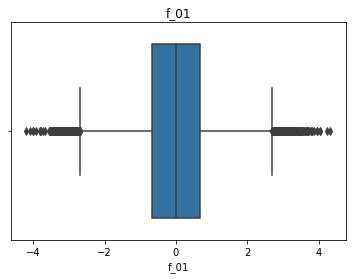

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


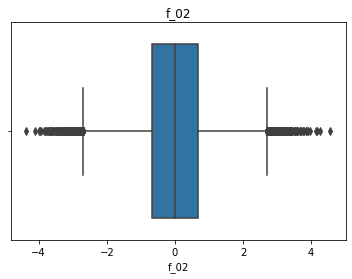

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


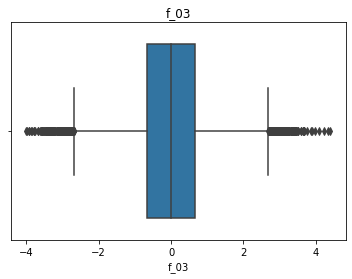

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


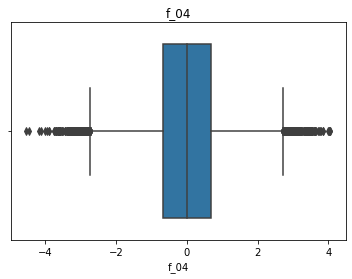

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


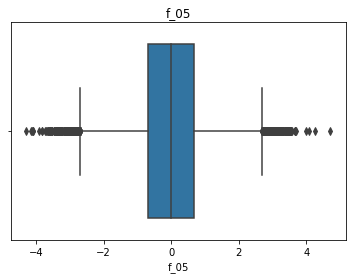

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


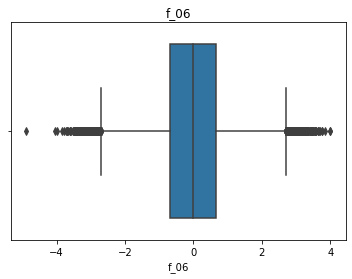

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


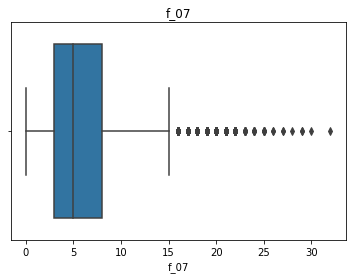

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


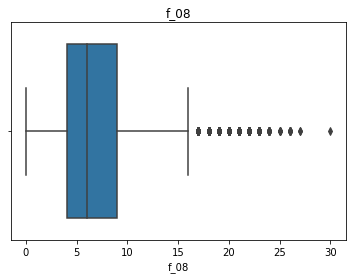

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


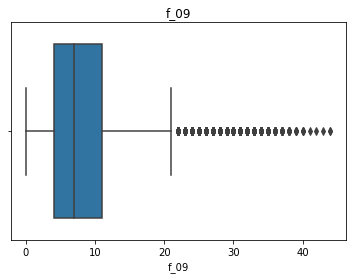

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


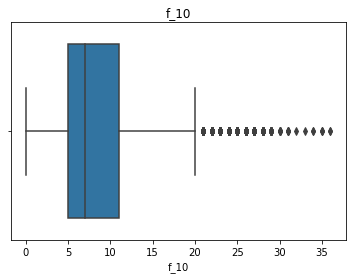

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


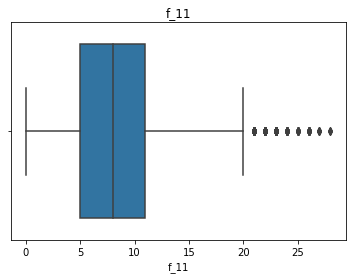

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


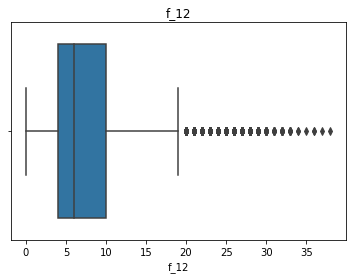

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


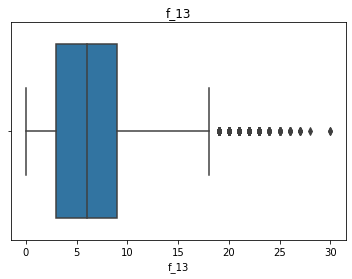

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


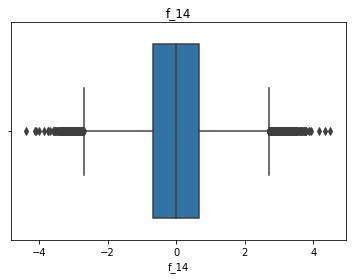

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


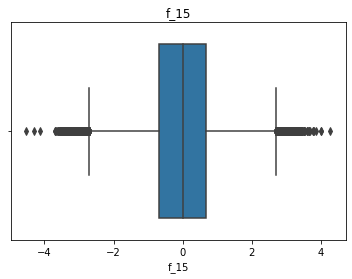

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


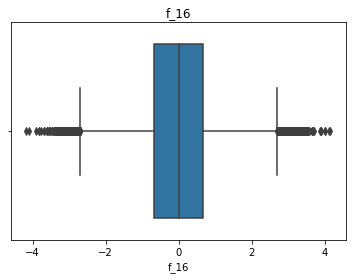

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


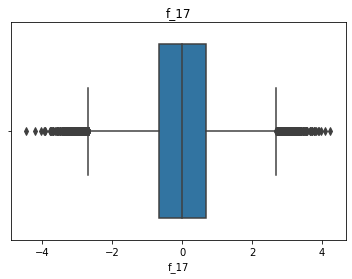

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


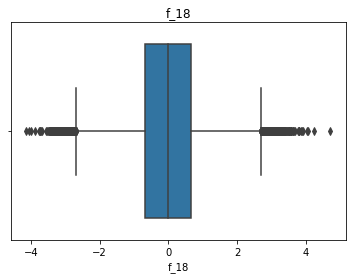

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


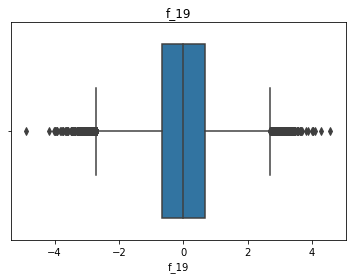

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


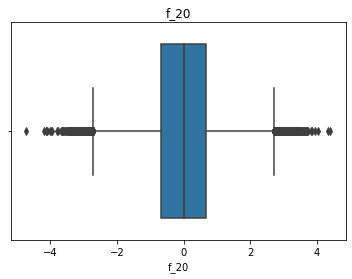

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


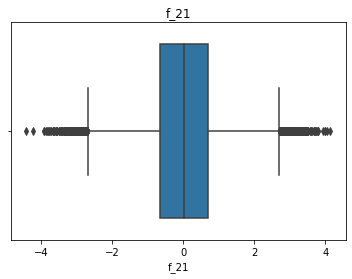

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


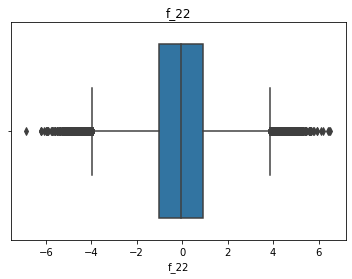

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


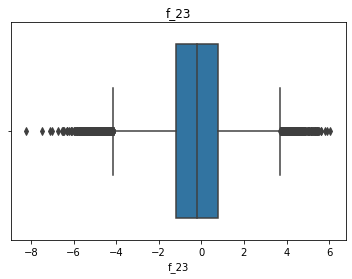

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


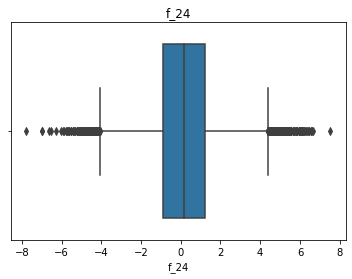

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


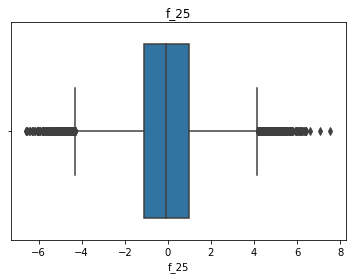

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


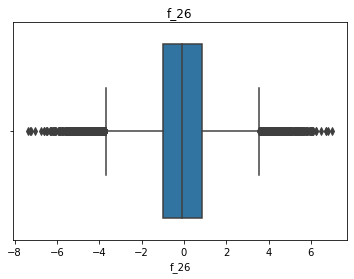

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


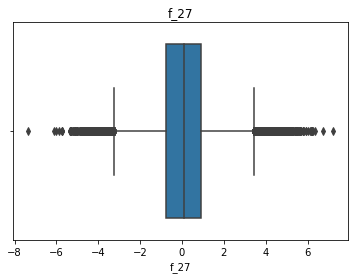

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


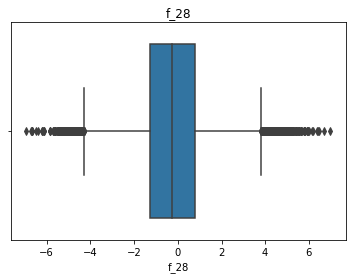

In [16]:
for feature in continous_feature:
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

All the continous features contains outliers.

In [17]:
def outlier_handling(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_bound = df[variable].quantile(0.25) - (1.5 * IQR)
    upper_bound = df[variable].quantile(0.75) + (1.5 * IQR)
    df.loc[df[variable] > upper_bound, variable] = upper_bound
    df.loc[df[variable] < lower_bound, variable] = lower_bound

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


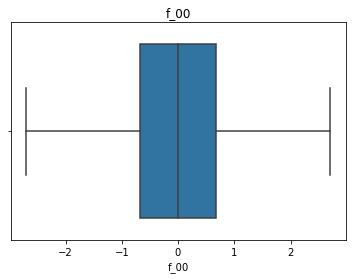

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


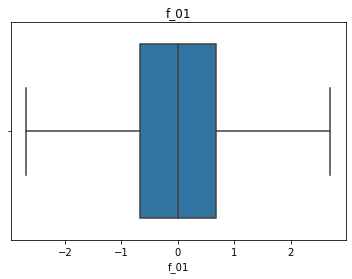

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


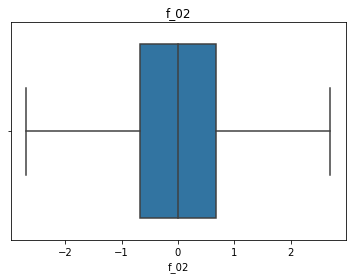

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


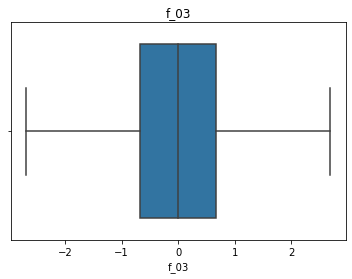

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


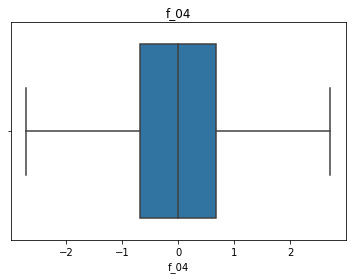

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


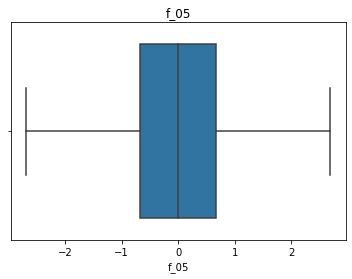

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


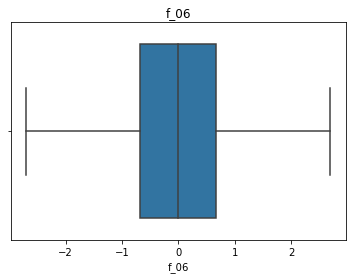

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


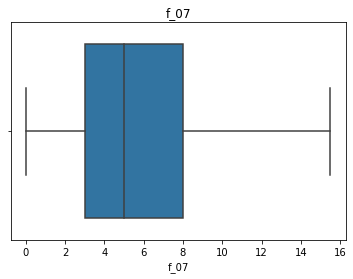

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


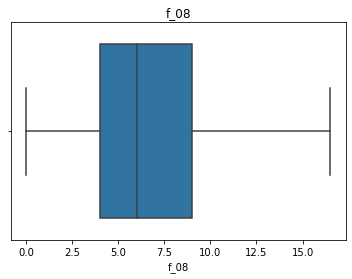

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


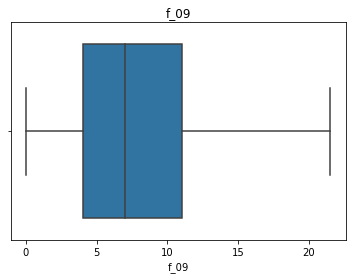

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


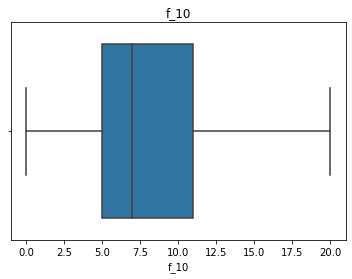

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


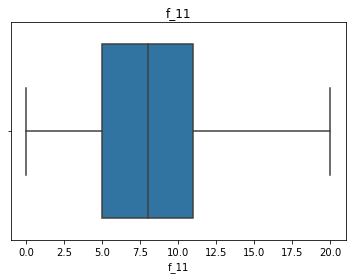

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


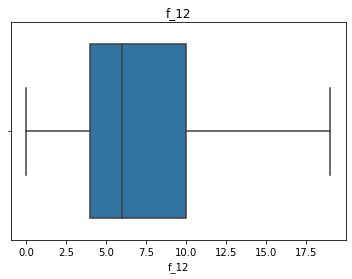

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


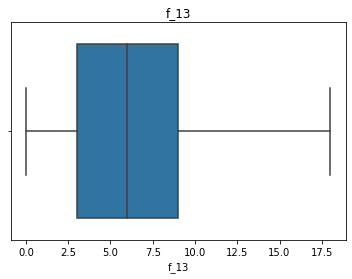

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


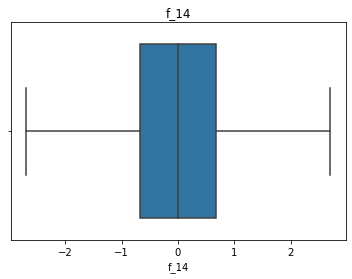

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


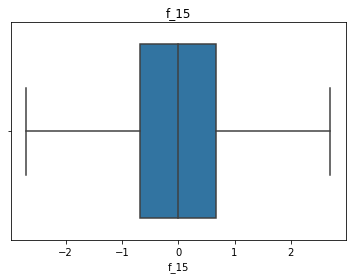

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


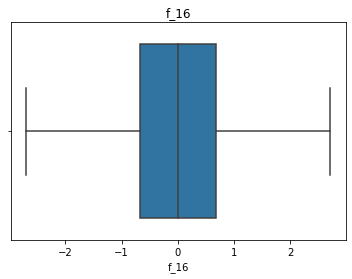

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


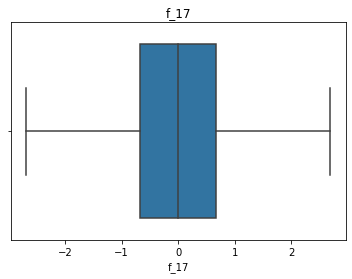

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


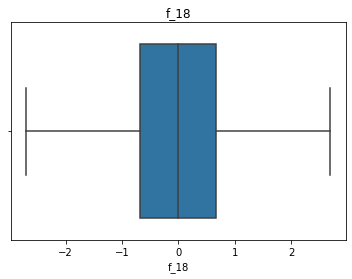

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


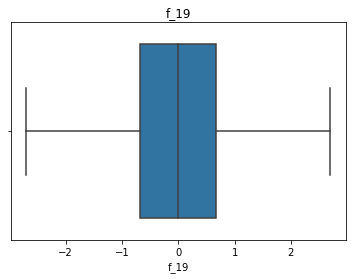

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


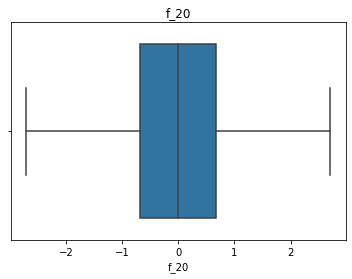

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


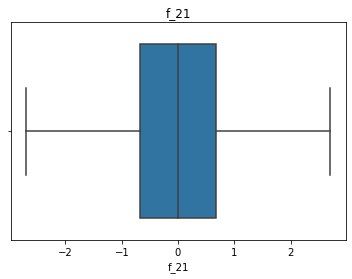

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


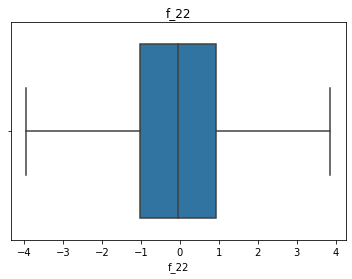

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


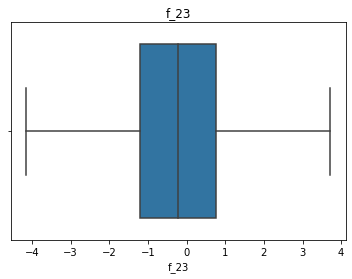

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


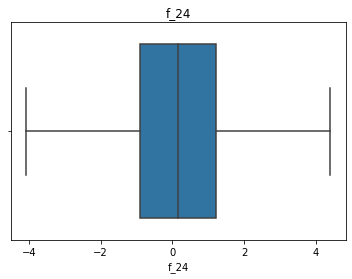

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


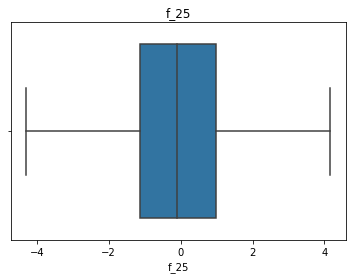

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


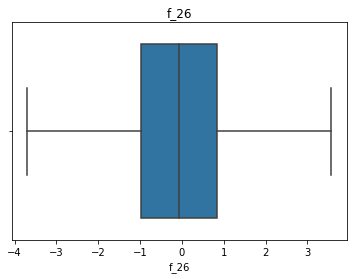

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


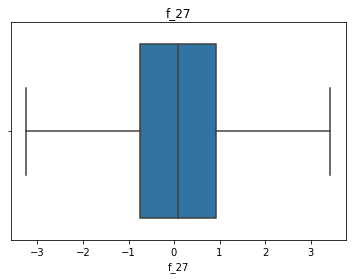

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


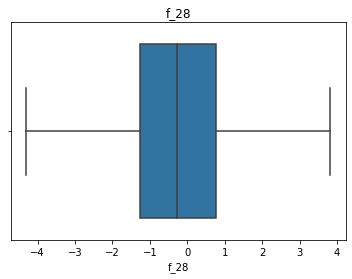

In [19]:
for feature in continous_feature:
    outlier_handling(df, feature)
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

All outliers are removed.

In [23]:
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2.0,13.0,14.0,5,13,6,6,-0.469819,0.358126,1.068105,-0.559650,-0.366905,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2.0,3.0,6.0,4,6,16,9,0.591035,-0.396915,0.145834,-0.030798,0.471167,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5.0,11.0,5.0,8,9,3,11,-0.679875,0.469326,0.349843,-0.288042,0.291470,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6.0,2.0,13.0,8,9,6,4,-0.389456,0.626762,-1.074543,-1.521753,-1.150806,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8.0,7.0,5.0,3,1,13,11,-0.120743,-0.615578,-1.064359,0.444142,0.428327,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [28]:
from sklearn.cluster import KMeans

In [29]:
X = df.drop(['id'], axis=1)

In [30]:
X.shape

(98000, 29)

In [31]:
km = KMeans()

In [32]:
km.fit(X)

KMeans()

In [38]:
prediction = km.predict(X)

In [39]:
id_column = df['id']

In [40]:
id_column = np.array(id_column)

In [41]:
id_column

array([    0,     1,     2, ..., 97997, 97998, 97999], dtype=int64)

In [42]:
prediction = np.array(prediction)

In [43]:
DataFrame = pd.DataFrame([id_column, prediction])

In [44]:
DataFrame = DataFrame.T

In [45]:
DataFrame.rename(columns={0: 'Id', 1: 'Predicted'}, inplace=True)

In [46]:
DataFrame.head()

,Id,Predicted
0,0,3
1,1,1
2,2,7
3,3,3
4,4,6


In [47]:
DataFrame.to_csv('submission_1.csv', index=False)

In [48]:
param_distribution = {
    'n_clusters' : [int(x) for x in np.linspace(start=8, stop=30, num=2)],
    'init' : ['k-means++', 'random'],
    'n_init' : [int(x) for x in np.linspace(start=10, stop=20, num=2)],
    'max_iter' : [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'tol' : [1e-4, 1.1e-4, 1.2e-4, 0.9e-4, 0.8e-4],
}

In [49]:
from sklearn.model_selection import KFold

In [50]:
cv = KFold(n_splits=3, shuffle=True, random_state=0)

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
km = KMeans()

In [53]:
km_randomcv = RandomizedSearchCV(estimator=km, param_distributions=param_distribution, cv=cv, n_iter=60, verbose=2, n_jobs=-1)

In [54]:
km_randomcv.fit(X)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=KMeans(), n_iter=60, n_jobs=-1,
                   param_distributions={'init': ['k-means++', 'random'],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600, 700, 800, 900, 1000],
                                        'n_clusters': [8, 30],
                                        'n_init': [10, 20],
                                        'tol': [0.0001, 0.00011, 0.00012, 9e-05,
                                                8e-05]},
                   verbose=2)

In [55]:
km_best_params = km_randomcv.best_params_

In [56]:
km_best_params

{'tol': 9e-05,
 'n_init': 20,
 'n_clusters': 30,
 'max_iter': 800,
 'init': 'k-means++'}

In [57]:
param_grid = {
   'tol' : [km_best_params['tol']-0.5e-5, km_best_params['tol']-0.25e-5,
           km_best_params['tol'], km_best_params['tol']+0.25e-5,
           km_best_params['tol']+0.5e-5],
    'n_init' : [km_best_params['n_init']-5, km_best_params['n_init']-3,
               km_best_params['n_init'], km_best_params['n_init']+3, km_best_params['n_init']+5],
    'n_clusters' : [km_best_params['n_clusters']-10, km_best_params['n_clusters']-5, 
                   km_best_params['n_clusters']-3, km_best_params['n_clusters']-2, 7, 10, 11],
    'max_iter' : [km_best_params['max_iter']-100, km_best_params['max_iter']-50,
                 km_best_params['max_iter'], km_best_params['max_iter']+50,
                 km_best_params['max_iter']+100],
    'init' : [km_best_params['init']]
}

In [62]:
from sklearn.model_selection import GridSearchCV
cv = KFold(n_splits=2, random_state=0, shuffle=True)

In [63]:
km_gridcv = GridSearchCV(estimator=km, param_grid=param_grid, cv=cv, verbose=2, n_jobs=-1)

In [64]:
km_gridcv.fit(X)

Fitting 2 folds for each of 875 candidates, totalling 1750 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=0, shuffle=True),
             estimator=KMeans(), n_jobs=-1,
             param_grid={'init': ['k-means++'],
                         'max_iter': [700, 750, 800, 850, 900],
                         'n_clusters': [20, 25, 27, 28, 7, 10, 11],
                         'n_init': [15, 17, 20, 23, 25],
                         'tol': [8.5e-05, 8.75e-05, 9e-05,
                                 9.250000000000001e-05, 9.5e-05]},
             verbose=2)

In [65]:
km_gridcv.best_params_

{'init': 'k-means++',
 'max_iter': 850,
 'n_clusters': 28,
 'n_init': 15,
 'tol': 9.5e-05}

In [66]:
best_estimator = km_gridcv.best_estimator_

In [67]:
prediction2 = best_estimator.predict(X)

In [68]:
prediction2

array([ 1, 11, 21, ..., 10, 17,  7])

In [69]:
DataFrame2 = pd.DataFrame([id_column, prediction2])

In [70]:
DataFrame2 = DataFrame2.T

In [71]:
DataFrame2.rename(columns={0: 'Id', 1: 'Predicted'}, inplace=True)

In [72]:
DataFrame2.head()

,Id,Predicted
0,0,1
1,1,11
2,2,21
3,3,22
4,4,19


In [73]:
DataFrame2.to_csv('submission_2.csv', index=False)

In [89]:
km_2 = KMeans(n_clusters=7)

In [90]:
km_2.fit(X)

KMeans(n_clusters=7)

In [91]:
prediction3 = km_2.predict(X)

In [92]:
DataFrame3 = pd.DataFrame([id_column, prediction3])
DataFrame3 = DataFrame3.T

In [93]:
DataFrame3.rename(columns={0: 'Id', 1: 'Predicted'}, inplace=True)

In [94]:
DataFrame3.head()

,Id,Predicted
0,0,5
1,1,1
2,2,5
3,3,4
4,4,3


In [95]:
DataFrame3.to_csv('submission_3.csv', index=False)

#### Using PCA

In [96]:
pca_param_distribution = {
    'n_components' : [2, 3, 4, 5],
    'svd_solver' : ['auto', 'full', 'arpack', 'randomized'],
    'power_iteration_normalizer' : ['auto', 'QR', 'LU', 'none']
}

In [99]:
from sklearn.decomposition import PCA
pca = PCA()

In [100]:
pca_randomcv = RandomizedSearchCV(estimator=pca, param_distributions=pca_param_distribution, cv=cv, verbose=2, n_jobs=-1)

In [101]:
pca_randomcv.fit(X)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=KFold(n_splits=2, random_state=0, shuffle=True),
                   estimator=PCA(), n_jobs=-1,
                   param_distributions={'n_components': [2, 3, 4, 5],
                                        'power_iteration_normalizer': ['auto',
                                                                       'QR',
                                                                       'LU',
                                                                       'none'],
                                        'svd_solver': ['auto', 'full', 'arpack',
                                                       'randomized']},
                   verbose=2)

In [102]:
pca_best_params = pca_randomcv.best_params_

In [103]:
pca_best_params

{'svd_solver': 'full', 'power_iteration_normalizer': 'QR', 'n_components': 5}

In [104]:
pca_param_grid = {
    'svd_solver' : [pca_best_params['svd_solver']],
    'power_iteration_normalizer' : [pca_best_params['power_iteration_normalizer']],
    'n_components' : [pca_best_params['n_components']-2, 
                     pca_best_params['n_components']-1,
                     pca_best_params['n_components'],
                     pca_best_params['n_components']+1, pca_best_params['n_components']+2]
}

In [105]:
pca_gridcv = GridSearchCV(estimator=pca, param_grid=pca_param_grid, cv=cv, verbose=2, n_jobs=-1)

In [106]:
pca_gridcv.fit(X)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=0, shuffle=True),
             estimator=PCA(), n_jobs=-1,
             param_grid={'n_components': [3, 4, 5, 6, 7],
                         'power_iteration_normalizer': ['QR'],
                         'svd_solver': ['full']},
             verbose=2)

In [107]:
pca_best_estimator = pca_gridcv.best_estimator_

In [108]:
pca_best_estimator

PCA(n_components=7, power_iteration_normalizer='QR', svd_solver='full')

In [111]:
X = df.drop(['id'], axis=1)

In [112]:
X.shape

(98000, 29)

In [113]:
X.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2.0,13.0,14.0,5,13,6,6,-0.469819,0.358126,1.068105,-0.559650,-0.366905,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2.0,3.0,6.0,4,6,16,9,0.591035,-0.396915,0.145834,-0.030798,0.471167,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5.0,11.0,5.0,8,9,3,11,-0.679875,0.469326,0.349843,-0.288042,0.291470,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6.0,2.0,13.0,8,9,6,4,-0.389456,0.626762,-1.074543,-1.521753,-1.150806,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8.0,7.0,5.0,3,1,13,11,-0.120743,-0.615578,-1.064359,0.444142,0.428327,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
scaler = StandardScaler()

In [116]:
X_scaled = scaler.fit_transform(X)

In [117]:
X_scaled[0]

array([-0.39189219, -0.92379358,  0.65338483,  0.5934766 , -0.82995004,
        0.73936108,  2.28109882, -0.97590198,  1.54697253,  1.08582027,
       -0.66056846,  1.18206882, -0.24098053, -0.06617819, -0.47659321,
        0.36273563,  1.066182  , -0.56412759, -0.36502756, -0.47481619,
       -0.75877176, -0.76701323, -0.71936915,  0.92128128, -0.68543521,
        0.77055101,  0.98188715,  1.07112254,  0.69100119])

In [118]:
X_pca = pca_best_estimator.fit_transform(X_scaled)

In [121]:
X_pca.shape

(98000, 7)

In [122]:
km_param_distribution = {
    'n_clusters' : [2, 3, 4, 5, 6],
    'init' : ['k-means++', 'random'],
    'n_init' : [int(x) for x in np.linspace(start=5, stop=15, num=2)],
    'max_iter' : [int(x) for x in np.linspace(start=300, stop=800, num=10)],
    'tol' : [1e-4, 1.1e-4, 1.2e-4, 0.9e-4, 0.8e-4],
}

In [123]:
km = KMeans()

In [124]:
km_randomcv = RandomizedSearchCV(estimator=km, param_distributions=km_param_distribution, cv=cv, verbose=2, n_iter=100, n_jobs=-1)

In [125]:
km_randomcv.fit(X_pca)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


RandomizedSearchCV(cv=KFold(n_splits=2, random_state=0, shuffle=True),
                   estimator=KMeans(), n_iter=100, n_jobs=-1,
                   param_distributions={'init': ['k-means++', 'random'],
                                        'max_iter': [300, 355, 411, 466, 522,
                                                     577, 633, 688, 744, 800],
                                        'n_clusters': [2, 3, 4, 5, 6],
                                        'n_init': [5, 15],
                                        'tol': [0.0001, 0.00011, 0.00012, 9e-05,
                                                8e-05]},
                   verbose=2)

In [126]:
km_best_params = km_randomcv.best_params_

In [127]:
km_best_params

{'tol': 0.0001,
 'n_init': 5,
 'n_clusters': 6,
 'max_iter': 744,
 'init': 'random'}

In [128]:
km_param_grid = {
    'tol' : [km_best_params['tol']-0.5e-5, km_best_params['tol']-0.25e-5,
            km_best_params['tol'], km_best_params['tol']+0.25e-5,
            km_best_params['tol']+0.5e-5],
    'n_init' : [km_best_params['n_init']-2, km_best_params['n_init']-1,
               km_best_params['n_init'], km_best_params['n_init']+1,
               km_best_params['n_init']+2],
    'n_clusters' : [km_best_params['n_clusters']-2, km_best_params['n_clusters']-1,
                   km_best_params['n_clusters'], km_best_params['n_clusters']+1,
                   km_best_params['n_clusters']+2],
    'max_iter' : [km_best_params['max_iter']-100, km_best_params['max_iter']-50,
                 km_best_params['max_iter'], km_best_params['max_iter']+50,
                 km_best_params['max_iter']+100],
    'init' : [km_best_params['init']],
}

In [129]:
km_gridcv = GridSearchCV(estimator=km, param_grid=km_param_grid, cv=cv, verbose=2, n_jobs=-1)

In [131]:
X_pca.shape

(98000, 7)

In [132]:
km_gridcv.fit(X_pca)

Fitting 2 folds for each of 625 candidates, totalling 1250 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=0, shuffle=True),
             estimator=KMeans(), n_jobs=-1,
             param_grid={'init': ['random'],
                         'max_iter': [644, 694, 744, 794, 844],
                         'n_clusters': [4, 5, 6, 7, 8],
                         'n_init': [3, 4, 5, 6, 7],
                         'tol': [9.5e-05, 9.75e-05, 0.0001,
                                 0.00010250000000000001, 0.000105]},
             verbose=2)

In [133]:
km_best_estimator = km_gridcv.best_estimator_

In [134]:
km_best_estimator

KMeans(init='random', max_iter=644, n_init=4, tol=9.75e-05)

In [135]:
km_gridcv.best_params_

{'init': 'random',
 'max_iter': 644,
 'n_clusters': 8,
 'n_init': 4,
 'tol': 9.75e-05}

In [136]:
predition_pca = km_best_estimator.predict(X_pca)

In [137]:
DataFrame_pca = pd.DataFrame([id_column, predition_pca])

In [138]:
DataFrame_pca = DataFrame_pca.T

In [139]:
DataFrame_pca.rename(columns={0: 'Id', 1: 'Predicted'}, inplace=True)

In [140]:
DataFrame_pca.head()

,Id,Predicted
0,0,1
1,1,5
2,2,6
3,3,3
4,4,5


In [141]:
DataFrame_pca.to_csv('submission_4.csv', index=False)

In [142]:
X_scaled

array([[-0.39189219, -0.92379358,  0.65338483, ...,  0.98188715,
         1.07112254,  0.69100119],
       [-0.69277933, -0.46216376,  0.65863492, ..., -0.56566423,
         0.3653729 , -1.61785692],
       [ 0.81083546,  0.32109459, -1.17548271, ...,  1.00099836,
        -0.94583197, -2.24573103],
       ...,
       [-0.25134205, -0.46778894,  1.89688878, ...,  1.57879869,
         1.21456927,  0.57730455],
       [ 0.31140834,  2.19308531,  0.76637596, ..., -1.10899141,
        -0.55835288,  0.1096758 ],
       [ 0.756736  ,  0.56548801,  1.46533567, ..., -0.65068022,
         1.0256576 , -0.31646129]])

In [143]:
pca = PCA(n_components=2)

In [145]:
X_pca_2 = pca.fit_transform(X_scaled)

In [146]:
X_pca_2

array([[-0.65602214, -0.13971343],
       [-1.10540583,  0.89396361],
       [-1.3512318 , -0.63872322],
       ...,
       [ 0.56311844,  0.74543598],
       [ 0.53980077,  1.23331693],
       [-1.76545931,  0.45817671]])

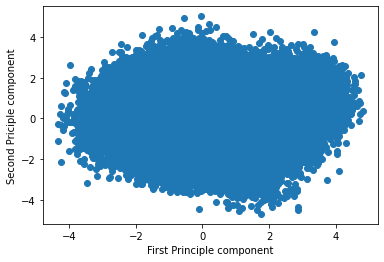

In [147]:
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1])
plt.xlabel("First Principle component")
plt.ylabel("Second Priciple component")
plt.show()

In [148]:
km_2 = KMeans(n_clusters=2)

In [149]:
km_2.fit(X_pca_2)

KMeans(n_clusters=2)

In [150]:
prediction_2 = km_2.predict(X_pca_2)

In [151]:
prediction_2

array([0, 0, 0, ..., 1, 1, 0])

In [152]:
dataFrame_2 = pd.DataFrame([id_column, prediction_2])

In [153]:
dataFrame_2 = dataFrame_2.T

In [154]:
dataFrame_2.rename(columns={0: 'Id', 1: 'Predicted'}, inplace=True)

In [155]:
dataFrame_2.head()

,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0


In [156]:
dataFrame_2.to_csv('submission_5.csv', index=False)

In [158]:
X_pca_2

array([[-0.65602214, -0.13971343],
       [-1.10540583,  0.89396361],
       [-1.3512318 , -0.63872322],
       ...,
       [ 0.56311844,  0.74543598],
       [ 0.53980077,  1.23331693],
       [-1.76545931,  0.45817671]])

In [159]:
km_3 = KMeans(n_clusters=4)

In [160]:
km_3.fit(X_pca_2)

KMeans(n_clusters=4)

In [161]:
prediction_3 = km_3.predict(X_pca_2)

In [162]:
dataFrame_3 = pd.DataFrame([id_column, prediction_3])

In [163]:
dataFrame_3 = dataFrame_3.T
dataFrame_3.rename(columns={0: 'Id', 1: 'Predicted'}, inplace=True)

In [164]:
dataFrame_3.to_csv('submission_5.csv', index=False)

In [165]:
prediction_3

array([0, 3, 0, ..., 3, 3, 0])